In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import
from sklearn.model_selection import train_test_split 

%matplotlib inline

advertising = pd.read_csv("https://www.statlearning.com/s/Advertising.csv", index_col=0)

advertising

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [3]:
advertising.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


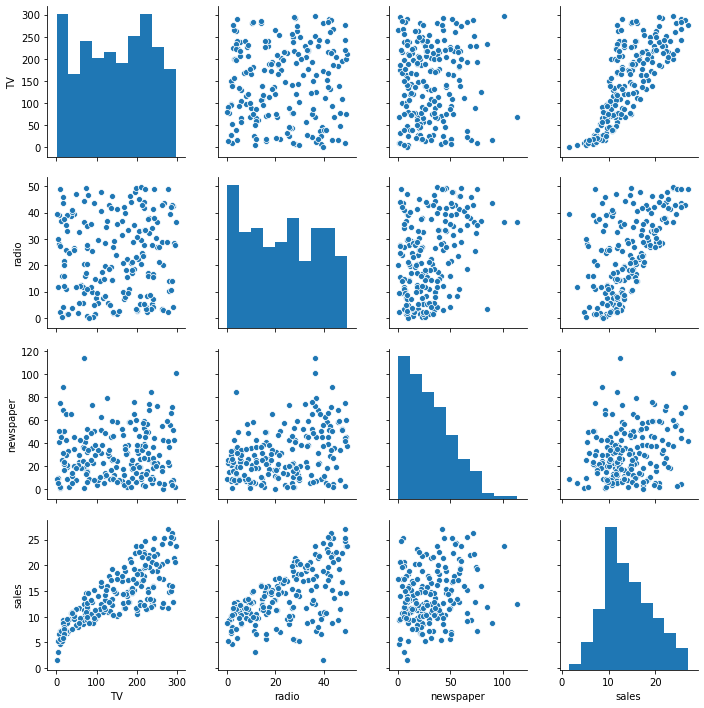

In [9]:
sns.pairplot(advertising)
plt.show()

In [18]:
# Selecting features
features = [i for i in advertising.columns if i != 'sales']
features

['TV', 'radio', 'newspaper']

In [16]:
# Specify the target
target = 'sales'
target

'sales'

In [19]:
# Split data into X and y

X = advertising[features]
y = advertising[target]

In [22]:
# Split into testing and training datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

(140, 3)

In [74]:
# Training the data

reg = linear_model.LinearRegression()

# Just trying something else random to test modularity of sklearn
# from sklearn import svm
# reg = svm.SVR()

reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [75]:
def predict_sales(TV, radio, newspaper):
    return reg.predict([[TV, radio, newspaper]])

In [76]:
predict_sales(100, 200, 300)

array([49.03711223])

In [77]:
predicted = reg.predict(X_test)
predicted

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

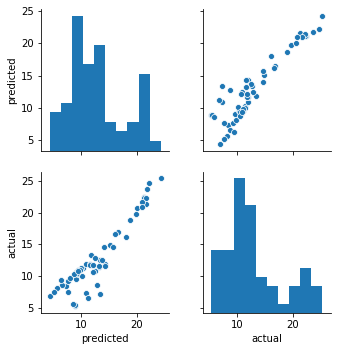

In [78]:
comparison = pd.DataFrame({
    "predicted": predicted,
    "actual": y_test
})

sns.pairplot(comparison)

In [79]:
# Calculating the Mean Squared Error

comparison["error"] = comparison["predicted"] - comparison["actual"]
comparison["squared_error"] = comparison["error"]**2

mse = comparison['squared_error'].mean()

In [80]:
# test-set mse
mse



3.7967972367152174

In [81]:
# test-set root squared mse
mse**0.5

1.948537204344638

In [82]:
print(f'Way of interpreting this is that this linear model is on average out by ${round(mse**0.5,1)}m')

Way of interpreting this is that this linear model is on average out by $1.9m


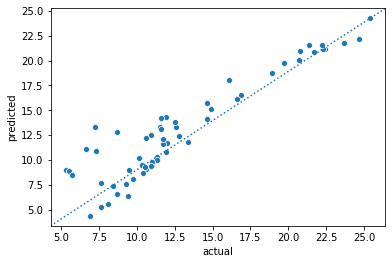

In [100]:
ax = sns.scatterplot(y='predicted', x='actual', data=comparison)
